In [46]:
def generate_starting_points():
  points = []
  for i in range(n_points):
    x, y = round(random()*100), round(random()*100)
    points.append([x, y])
  fig, ax = plt.subplots()
  ax = plt.scatter([x for x, y in points], [y for x,y in points])
  plt.show()
  return points


def graph_top_fitness(points, i):
  fig, ax = plt.subplots()
  ax = plt.plot([x for x,y in points[0]], [y for x,y in points[0]])
  plt.title(f'Epoch #{i}\nDistance: {round(points[1], 2)}')
  plt.show()


def generate_organisms(points):
  organisms = []
  for _ in range(population):
    new_points = points.copy(); shuffle(new_points)
    new_points.append(new_points[0])
    organisms.append(new_points)
  return organisms


def calculate_fitness(organisms):
  fitness_score = []
  for organism in organisms:
    distance = 0
    last_point = None
    for x2, y2 in organism:
      if last_point:
        x1, y1 = last_point[0], last_point[1]
        distance += ((x1-x2)**2 + (y1-y2)**2)**0.5
      last_point = (x2, y2)
    fitness_score.append([organism, distance])
  return sorted(fitness_score, key=lambda x: x[1])


def next_generation(fitness):
  
  def get_child(p1,p2):
    p2.pop()
    for p in p1:
      p2.remove(p)
    return p1 + p2 + [p1[0]]

  organisms = []
  for i in range(len(fitness)//2)[::2]:
    p1, p2 = fitness[i][0], fitness[i+1][0]
    children = [
      get_child(p1[:n_points//2], p2[:]),
      get_child(p1[n_points//2:], p2[:]),
      get_child(p2[:n_points//2], p1[:]),
      get_child(p2[n_points//2:], p1[:]),
    ]
    for child in children:
      random_chance = random()
      if random_chance <= mutation:
        r1 = choice(range(1, n_points))
        r2 = choice(range(1, n_points))
        child[r1], child[r2] = child[r2], child[r1]
      organisms.append(child)
  return organisms


def plot_progression():
  fig, ax = plt.subplots(figsize=(18,7))
  ax = plt.plot(top_distances)
  plt.title(f'Best: {round(min(top_distances),2)}, Last: {round(top_distances[-1],2)}')
  plt.show()

In [41]:
from IPython.display import display
import ipywidgets as widgets
from random import choice, random, shuffle, seed
import matplotlib.pyplot as plt
import numpy as np

mutation_widget = widgets.FloatSlider(
  min = 0,
  max = 1,
  step = 0.01,
  value = 0.05,
  description='Mutation:'
)
population_widget = widgets.IntSlider(
  min = 0,
  max = 200,
  step = 10,
  value=50,
  description='Population:'
)
n_points_widget = widgets.IntSlider(
  min = 0,
  max = 50,
  step = 2,
  value= 14,
  description='Graph Points:'
)
epochs_widget = widgets.IntSlider(
  min = 1,
  max = 1000,
  step = 1,
  value= 100,
  description='Epochs:'
)
nth_display_widget = widgets.IntSlider(
  min = 1,
  max = 1000,
  step = 1,
  value= 10,
  description='N-th Display:'
)
display(mutation_widget, population_widget,
        n_points_widget, epochs_widget, nth_display_widget)

FloatSlider(value=0.05, description='Mutation:', max=1.0, step=0.01)

IntSlider(value=50, description='Population:', max=200, step=10)

IntSlider(value=14, description='Graph Points:', max=50, step=2)

IntSlider(value=100, description='Epochs:', max=1000, min=1)

IntSlider(value=10, description='N-th Display:', max=1000, min=1)

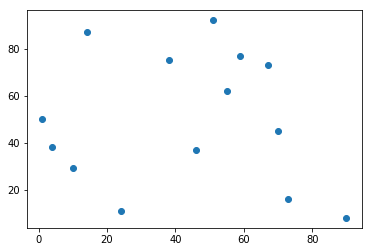

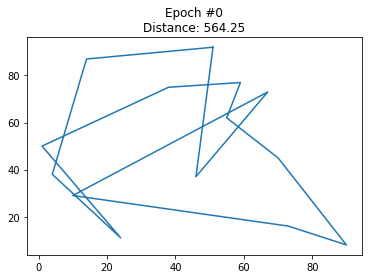

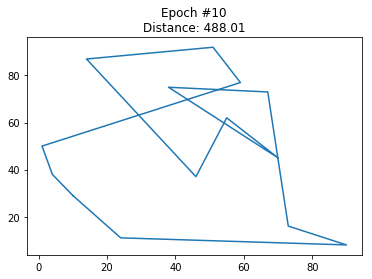

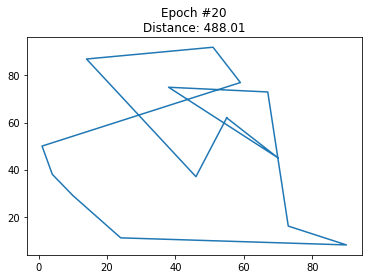

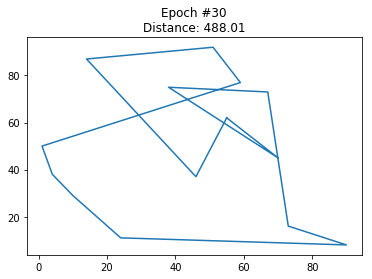

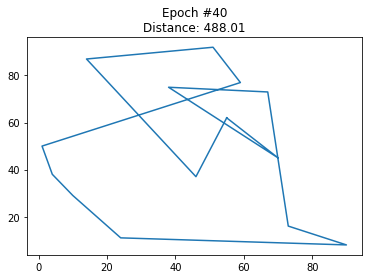

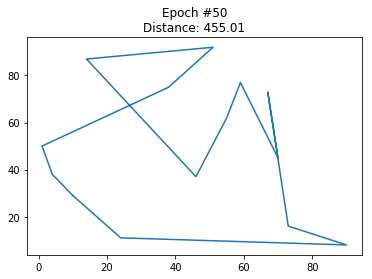

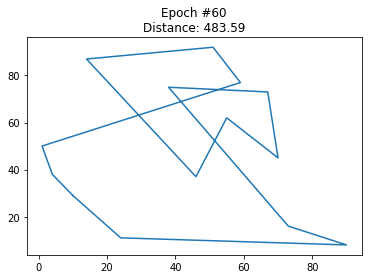

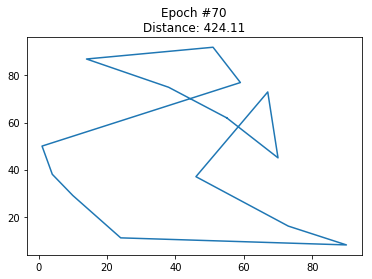

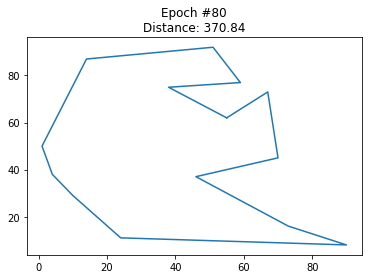

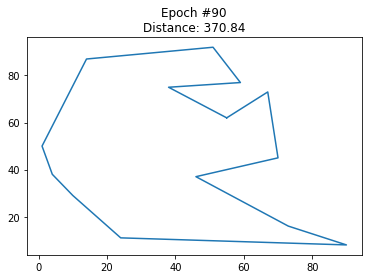

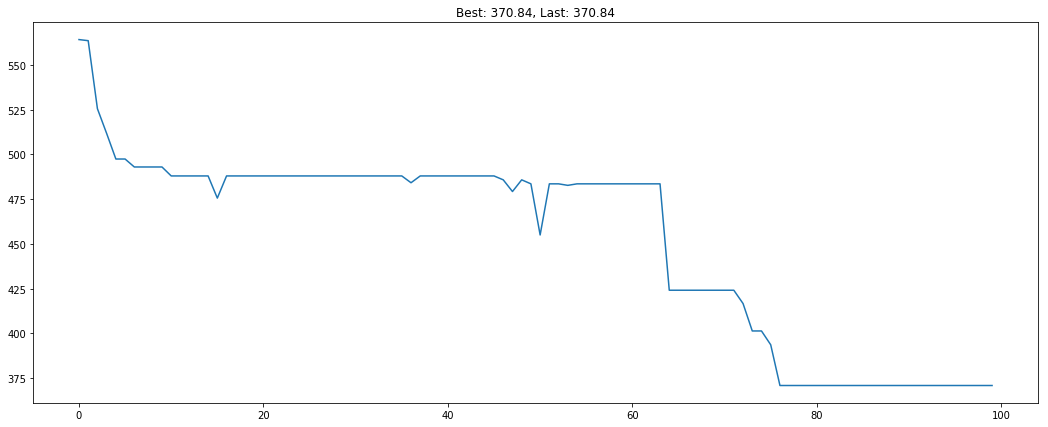

In [50]:
seed(9)

mutation = mutation_widget.value
population = population_widget.value 
n_points = n_points_widget.value 
epochs = epochs_widget.value 
nth_display = nth_display_widget.value

top_distances = []
top_points = []
points = generate_starting_points()

organisms = generate_organisms(points)
for i in range(epochs):
  fitness = calculate_fitness(organisms)
  top_points.append(fitness[0])
  top_distances.append(fitness[0][1])
  organisms = next_generation(fitness)
  if i % nth_display == 0:
    graph_top_fitness(fitness[0], i)
plot_progression()